<a href="https://colab.research.google.com/github/Karthikard/canteen/blob/main/canteen_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [209]:
warnings.filterwarnings('ignore')

In [210]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [211]:
ls

Restaurant_review_model  Restaurant_Reviews.tsv  sample_data/


In [212]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Above review independent variable . Liked is the target variable.

In [213]:
data.shape

(1000, 2)

Check for missing values

In [214]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

check dataset balanced or not.(Contains both liked and unliked data)

In [215]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [216]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


created new column in dataset char_count which displays the count of the letter.

In [217]:
data['char_count'] = data['Review'].apply(len)

In [218]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


create new column word_count to Count number of words

In [219]:
data['word_count']=data['Review'].apply(lambda x : len(str(x).split()))

In [220]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


Count number of sentence using nltk lib.

In [221]:
import nltk

In [222]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
data['sent_count']=data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [224]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


Count average for positive review and negative review

In [225]:
data[data['Liked']==1]['char_count'].mean()

55.88

In [226]:
data[data['Liked']==0]['char_count'].mean()

60.75

regular expression to remove non alphabatic character with space

In [227]:
import re

In [228]:
data['Review'][0]

'Wow... Loved this place.'

In [229]:
review=re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [230]:
review=review.lower()

In [231]:
review

'crust is not good '

Split review

In [232]:
review=review.split()

In [233]:
review

['crust', 'is', 'not', 'good']

stopwords removing

In [234]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
from nltk.corpus import stopwords

In [236]:
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')

In [237]:
stopwords

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>

In [238]:
review = [word for word in review if word not in set(all_stopwords)]

In [239]:
review

['crust', 'not', 'good']

stem : used in nlp.Reduce words . Map and groups words. Algorithm : PorterStemmer

In [240]:
from nltk.stem.porter import PorterStemmer

In [241]:
ps=PorterStemmer()

In [242]:
review = [ps.stem(word) for word in review]

In [243]:
review= " ".join(review)

In [244]:
review

'crust not good'

In [245]:
import re
custom_stopwords = {'don',"don't",'ain','aren',"aren't","couldn't",'didn',"didn't"
                    'doesn','hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',
                    "isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",
                    'shan',"shan't",'no','nor','not','shouldn',"shouldn't",'wasn',"wasn't",
                    'won',"won't",'wouldn',"wouldn't"}

corpus=[]
ps=PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
  review=review.lower()
  review=review.split()
  review = [ps.stem(word) for word in review if word not in stop_words]
  review= " ".join(review)
  corpus.append(review)

In [246]:
data['processed_text']=corpus

In [247]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


display word cloud.It is pictorial representation

In [248]:
from wordcloud import WordCloud

In [249]:
wc=WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [250]:
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))

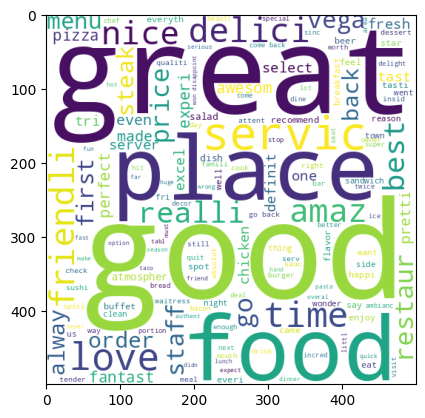

In [251]:
plt.imshow(pos)

In [252]:
negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))

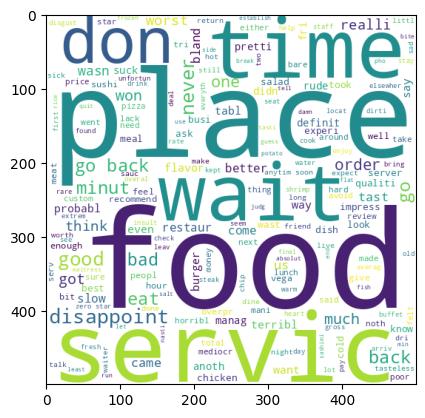

In [253]:
plt.imshow(negative)

In [254]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


text into numerical. count vectorizer: matrix.

In [255]:
from sklearn.feature_extraction.text import CountVectorizer

In [256]:
cv=CountVectorizer(max_features=1500)

In [257]:
x=cv.fit_transform(corpus).toarray()

In [258]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [259]:
x.shape

(1000, 1500)

In [260]:
y=data['Liked']

In [261]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [264]:
from sklearn.naive_bayes import GaussianNB

In [265]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [266]:
from sklearn.metrics import accuracy_score

In [267]:
accuracy_score(y_test,y_pred)

0.675

In [268]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.79

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.78

RandomForest 80%

In [270]:
import joblib

In [271]:
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']

In [273]:
!pip install nltk

In [274]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

GUI

In [275]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("400x300")  # Set a custom size for the window

        # Load your pre-trained Random Forest model and CountVectorizer
        # Replace 'your_model.pkl' and 'your_vectorizer.pkl' with the actual filenames
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

        # Create and set up widgets
        title_font = ('Helvetica', 16, 'bold')  # Larger font for the title
        self.label = ttk.Label(master, text="Enter your restaurant review:", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        # Increase button size and change color on press
        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        # Style configuration for the button
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            # Transform the processed_input using the CountVectorizer
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable